In [5]:
# Captures as many frames as you input with
# timeDelay (seconds) between each (some connections may need this changed)
# and saves them in a folder called 'happy'
# in the GOOGLE_DATASET_FOLDER you set.
# make sure to rename the happy folder to avoid overwriting images.
from google.colab import drive
drive.mount('/content/drive')
import os
#os.makedirs('/content/drive/My Drive/Colab Notebooks')
################################
GOOGLE_DATASET_FOLDER = "/content/drive/MyDrive/Senior Project - Grad/Tests-Programming/datasetBuilder/colab_emotion_dataset/"
################################

# NOTE: you can include a capture button to capture single frames at a time
# by uncommenting line 27 in takePhoto()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# @title
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  print(f"{filename} taken...")
  return filename

Available emotions: 
 ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']
What's the EMOTION? (default happy) 
capturing:  happy
What's your name? eric
current dataset folder path:  /content/drive/MyDrive/Senior Project - Grad/Tests-Programming/datasetBuilder/colab_emotion_dataset/
press enter to use, or enter the dataset folder path: /content/drive/MyDrive/Senior Project - Grad/Tests-Programming/datasetBuilder/PUBLIC_datasetInProgress
How many frames do you want to capture this session?1
You are about to capture 1 images.
Make sure to appear: happy
Get ready!
/content/drive/MyDrive/Senior Project - Grad/Tests-Programming/datasetBuilder/PUBLIC_datasetInProgress/happy_eric/


<IPython.core.display.Javascript object>

/content/drive/MyDrive/Senior Project - Grad/Tests-Programming/datasetBuilder/PUBLIC_datasetInProgress/happy_eric/happy_0.jpg taken...


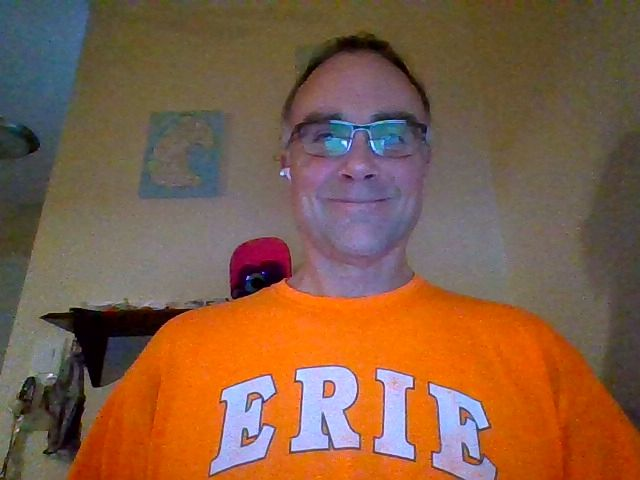

In [8]:
# @title
# importing OpenCV library
import cv2
import numpy as np
import os
import time



def capture_database_frames(data_dir, num_frames_to_capture, category_maximum,
                            target_resolution = (256,256), delay_s = 0.05,
                            ext = ".png", name_length = 5, cam_port = 0, emotion = 'happy'):
    print(data_dir)
    for each in range(num_frames_to_capture):
      filename = take_photo(data_dir+emotion+"_"+str(each)+'.jpg')
      time.sleep(delay_s)

    return filename

def mkdir_if_dne(directory):
    if not os.path.exists(directory):
        os.mkdir(directory)

def main(GOOGLE_DATASET_FOLDER = GOOGLE_DATASET_FOLDER):
    category_maximum = 300
    num_frames_to_capture = 3 #128
    target_resolution = (256,256)
    delay_between_frames_s = 0.05 #capture delay in seconds

    emotionList = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']
    emotion = ' '
    print("Available emotions: \n",emotionList)
    while emotion not in emotionList and emotion != '':
      emotion = str(input("What's the EMOTION? (default happy) ")).lower()
    if emotion == '':
      emotion = 'happy'
    print("capturing: ", emotion)

    name = str(input("What's your name? "))
    if name == "":
      name = ' '

    print ("current dataset folder path: ", GOOGLE_DATASET_FOLDER)
    test = str(input("press enter to use, or enter the dataset folder path: "))

    if test != '':
      GOOGLE_DATASET_FOLDER = test

    main_dataset_folder = GOOGLE_DATASET_FOLDER + '/'
    mkdir_if_dne(main_dataset_folder)

    emotion_subfolder = main_dataset_folder + emotion + "_" + name + "/"
    mkdir_if_dne(emotion_subfolder)

    num_frames_to_capture = int(input("How many frames do you want to capture this session?"))
    print("You are about to capture " + str(num_frames_to_capture) + " images.")
    print("Make sure to appear: " + str(emotion))
    print("Get ready!")

    lastImage = capture_database_frames(emotion_subfolder, num_frames_to_capture,
                                        category_maximum, target_resolution = target_resolution,
                                        delay_s = delay_between_frames_s, emotion = emotion)

    from IPython.display import Image
    try:
      # Show the image which was just taken.
      display(Image(lastImage))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))

if __name__ == "__main__":
    main()